<a href="https://colab.research.google.com/github/nilaynishant/AIMLTutorial/blob/main/01_geospatial_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and data download


In [17]:
%%capture
if 'google.colab' in str(get_ipython()):
# run this only if you have not installed the requried packages
  !pip install rasterio
  !pip install geopandas
  !pip install gitpython
  !pip install leafmap
  !pip install localtileserver

In [18]:
import os
import rasterio as rio
# from rasterio.plot import show
# import geopandas as gpd
# import fiona
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# Data download
data_url = (
    'https://github.com/nilaynishant/AIMLTutorial/blob/main/Data/Sentinel2_Agartala.tif'
)
leafmap.download_file(data_url, 'sentinel.tif', unzip=False)

Downloading...
From: https://raw.githubusercontent.com/nilaynishant/AIMLTutorial/main/Data/Sentinel2_Agartala.tif
To: /content/sentinel.tif
100%|██████████| 36.9M/36.9M [00:00<00:00, 137MB/s]


'/content/sentinel.tif'

In [20]:
raster_loc='sentinel.tif'

In [21]:
src = rio.open(raster_loc)

blue = src.read(4, masked=True)
green = src.read(3, masked=True)
red = src.read(2, masked=True)
nir = src.read(1, masked=True)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
nirn = normalize(nir)

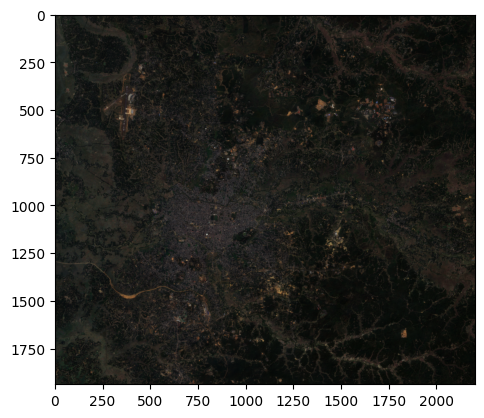

In [22]:
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

## Exrecise
Plot the sentinel data as FCC

## Dynamic visualization

In [14]:
import leafmap

m = leafmap.Map()
m.add_stac_layer(
    collection="landsat-c2-l2",
    item="LC09_L2SP_137043_20230416_02_T1",
    assets="red",
    rescale="0,12000",
    colormap_name="greys",
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [6]:
import leafmap

m = leafmap.Map()
m.add_stac_layer(
    collection="sentinel-2-l2a",
    item="S2B_MSIL2A_20230416T042709_R133_T46QCM_20230416T084913",
    assets=["B04", "B03", "B02"],
    color_formula="Gamma RGB 3.2 Saturation 0.8 Sigmoidal RGB 25 0.35",
    nodata=0,
    rescale="0,50000",
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [12]:
import leafmap

m = leafmap.Map()
m.add_stac_layer(
    collection="sentinel-2-l2a",
    item="S2B_MSIL2A_20230416T042709_R133_T46QCM_20230416T084913",
    assets=["B08, B04"],
    expression="(B08 - B04) / (B08 + B04)",
    rescale="-.5,0.5",
    colormap_name="rdylgn",
    name="NDVI",
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Exercise

Compute NDWI using STAC API